## Análise de Séries Temporais em Python
Problema de Negócio:
Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas de Janeiro/2024?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os Dados 

In [2]:
df_dsa = pd.read_csv('dataset.csv')

In [3]:
df_dsa.shape

(365, 2)

In [6]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [7]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [8]:
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-Processamento dos Dados

In [9]:
#Valor mínimo da coluna data
df_dsa['Data'].min()

'2023-01-01'

In [10]:
#Valor máximo da coluna data
df_dsa['Data'].max()

'2023-12-31'

In [12]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
#Convertendo a coluna data para o tipo datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [6]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [8]:
#Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [9]:
type(serie_temporal)

pandas.core.series.Series

In [10]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [11]:
#Fornece a frequência da série temporal (diária)
serie_temporal = serie_temporal.asfreq('D')

In [12]:
serie_temporal 

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise Exploratória

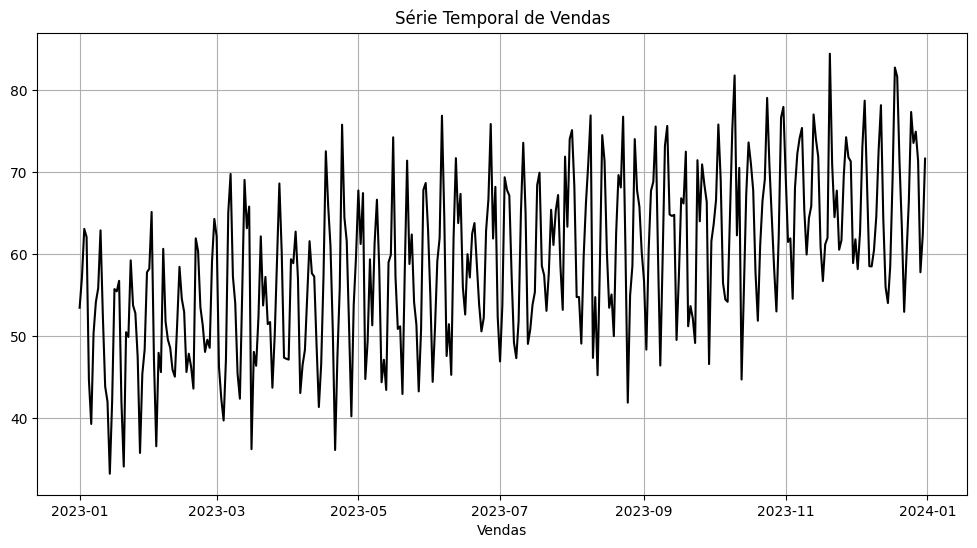

In [13]:
#Cria o gráfico de série temporal (sem formatação)
plt.figure(figsize = (12,6))
plt.plot(serie_temporal, color = 'k')
plt.xlabel('Data')
plt.xlabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

## Suavização Exponencial
É uma técnica de análise e previsão de séries temporais que aplica média ponderadas aps dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. A suavização exponencial é útil para lidar com tendências e sazonalidades nos dados, e para reduzir ruído.

## Suposições da Suavização Exponencial  

No Statsmodels, a classe SimpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo SimpleExpSmoothing do Statsmodels, conhecido como suavização exponencial simples ou média móvel exponencial ponderada, é uma técnica de suavização de séries temporais que atribui pesoas decrescentes exponenciamente aos pontos de dados passados. Usado principalmente para suavizar séries temporais e fazer previsões de curto prazo. Principais suposições:

 Série temporal é composta por um componente de nícel (média) e um componente de erro aleatório (ruído). Não há componentes de tendência ou sazionalidade;
 O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado;
 O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesoas. Valores próximos a 1 ão maior pesoa aos dados mais recentes, enquanto os próximos a 0 dão mais peso aos dados mais antigos.

In [14]:
#Cria o modelo, vai criar uma instância da classe SimpleExpSmoothing utilizando a coluna 'Vendas' da série serie_temporal
modelo = SimpleExpSmoothing(serie_temporal)

In [16]:
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

Treinamento (ajuste) do modelo, 0.2 é o paramêtro de suavização alfa, esse parâmetro controla a rapidez que os pesos descrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, um valor maior atribui mais peso aos dados mais recentes e um valor menor aos mais antigos. O alfa varia entre 0 e 1.

In [17]:
#Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

Essa linha vai extrair os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, onde são aplicados pesos exponenciais aos dados históricos. Esses valores são usados para analisar a série tempotal suavizada, indentificar tendências e comparar com outras técnicas.

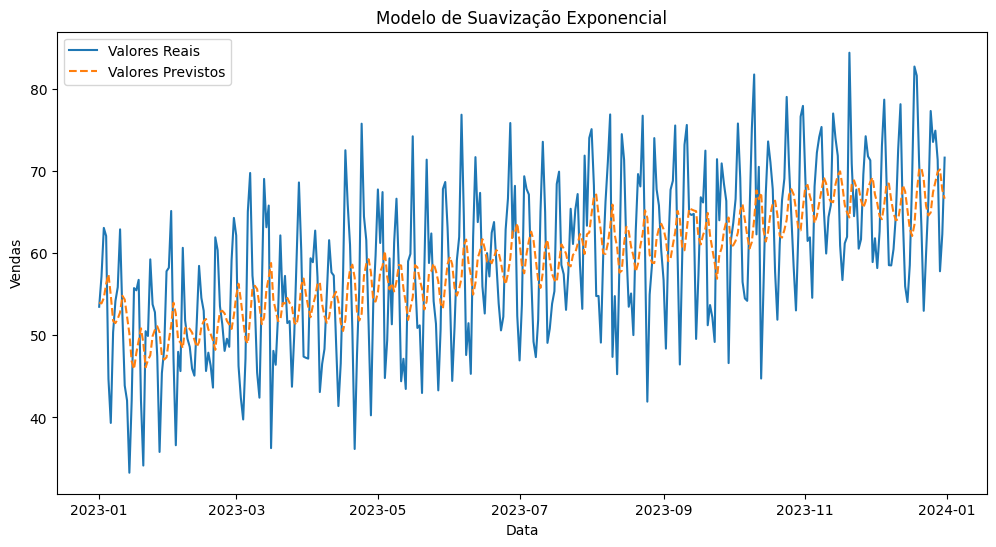

In [18]:
plt.figure(figsize = (12,6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label ='Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## Deploy do Modelo com Modelo Treinado

In [19]:
# Fazer previsões
num_previsoes =1
previsoes = modelo_ajustado.forecast(steps =num_previsoes )

In [20]:
print('Previsão do Total de Vendas para Janeiro/2024', round(previsoes[0],4))

Previsão do Total de Vendas para Janeiro/2024 67.6499


# Fim